# Young People Survey

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
sns.set_style("white")
plt.style.use("seaborn-v0_8-paper")
plt.rcParams["font.family"] = "monospace"
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

# Wrangling

In [2]:
path = "../data/young_people_survey/responses.csv"
df = pd.read_csv(path, header=0)
print(df.shape)
df.head()

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
for i in df.columns:
    print(i)

Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Rock n roll
Alternative
Latino
Techno, Trance
Opera
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
Law
Cars
Art exhibitions
Religion
Countryside, outdoors
Dancing
Musical instruments
Writing
Passive sport
Active sport
Gardening
Celebrities
Shopping
Science and technology
Theatre
Fun with friends
Adrenaline sports
Pets
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Smoking
Alcohol
Healthy eating
Daily events
Prioritising workload
Writing notes
Workaholism
Thinking ahead
Final judgement
Reliability
Keeping promises
Loss of interest
Friends versus money
Funniness
Fake
Criminal damage
Decision making
Elec

The columns can be split into groups:
- Music preferences (19 items)
- Movie preferences (12 items)
- Hobbies & interests (32 items)
- Phobias (10 items)
- Health habits (3 items)
- Personality traits, views on life, & opinions (57 items)
- Spending habits (7 items)
- Demographics (10 items)

In [4]:
cols_music  = df.columns[:19] # 19
cols_movie  = df.columns[19: 31] # 12
cols_hobby  = df.columns[31: 63] # 32
cols_phobia = df.columns[63: 73] # 10
cols_health = df.columns[73: 76] # 3
cols_life   = df.columns[76: 133] # 57
cols_money  = df.columns[133: 140] # 7
cols_demog  = df.columns[140:] # 10

In [5]:
cols_demog

Index(['Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object')

## Handle missing values

In [6]:

# * Let's see if there are any null values by looking at the Non-Null Count.
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 150 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    Music                           1007 non-null   float64
 1    Slow songs or fast songs        1008 non-null   float64
 2    Dance                           1006 non-null   float64
 3    Folk                            1005 non-null   float64
 4    Country                         1005 non-null   float64
 5    Classical music                 1003 non-null   float64
 6    Musical                         1008 non-null   float64
 7    Pop                             1007 non-null   float64
 8    Rock                            1004 non-null   float64
 9    Metal or Hardrock               1007 non-null   float64
 10   Punk                            1002 non-null   float64
 11   Hiphop, Rap                     1006 non-null   float64
 12   Reggae, Ska       

In [7]:

# ? How many NaN values?
df.isna().sum().sum()

# * Sometimes the dataset authors replace NaN values with strings like "null", "NA".
# * A data analyst has to manually check for these.

608

In [8]:

# ? How many entries have at least one NaN value?
df.isna().any(axis=1).sum()

336

In [9]:

# ? How many columns have at least one NaN value?
df.isna().any(axis=0).sum()

144

In [10]:

# ? What is the distribution of missing values across rows?
df.isna().sum(axis=1).value_counts()

0    674
1    201
2     71
3     31
4     14
6      8
5      5
7      5
8      1
Name: count, dtype: int64

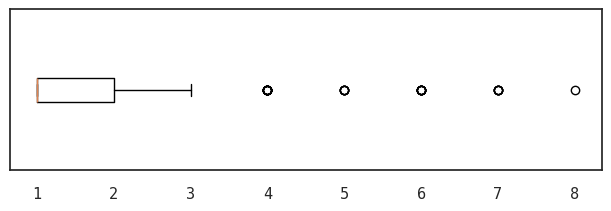

In [11]:

# ? What is the distribution of missing values across rows?
missing_values_rows = df.isna().sum(axis=1)
# ignore entries with no NaN values.
missing_values_rows = missing_values_rows[missing_values_rows > 0]

fig, ax = plt.subplots(layout="constrained", figsize=(6 ,2))
ax.boxplot(missing_values_rows, vert=False)
ax.set_yticklabels("")
plt.show()

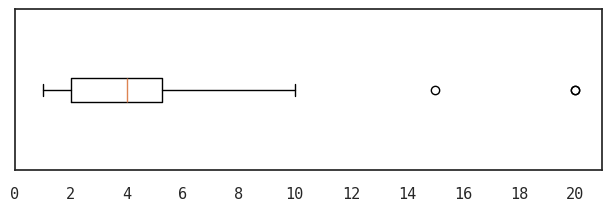

In [12]:

# ? What is the distribution of missing values across columns?
missing_values_cols = df.isna().sum(axis=0)
# ignore entries with no NaN values.
missing_values_cols = missing_values_cols[missing_values_cols > 0]

fig, ax = plt.subplots(layout="constrained", figsize=(6, 2))
ax.boxplot(missing_values_cols, vert=False)
ax.set_xticks(range(0, 1 + missing_values_cols.max(), 2))
ax.set_yticklabels("")
plt.show()

In [13]:

# * Set numeric ratings to 0 and object datatypes to NR (Not reported).

# Iterate over the columns
for col in df.columns:
    # Check the dataype and fill NaN values accordingly.
    if df[col].dtype == "object":
        # Option 1 is preferred.
        df[col] = df[col].fillna("NR") # Option 1
        # df.fillna(value={col: "NR"}, inplace=True) # Option 2
        #! Don't do this:
        #! df[col].fillna(value="NR", inplace=True)
        #! You'll fill NA values in a copy of df.
    else:
        df[col] = df[col].fillna(0)

In [14]:
# Let's recheck the #NaN values.
df.isna().any(axis=0).sum(), df.isna().any(axis=1).sum()

(0, 0)

## Column Data Types

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 150 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    Music                           float64
 1    Slow songs or fast songs        float64
 2    Dance                           float64
 3    Folk                            float64
 4    Country                         float64
 5    Classical music                 float64
 6    Musical                         float64
 7    Pop                             float64
 8    Rock                            float64
 9    Metal or Hardrock               float64
 10   Punk                            float64
 11   Hiphop, Rap                     float64
 12   Reggae, Ska                     float64
 13   Swing, Jazz                     float64
 14   Rock n roll                     float64
 15   Alternative                     float64
 16   Latino                          float64
 17   Techno, Tran

- Column entries are ratings between 1 - 5. We should convert them from floats to integers.
- Columns that are of datatype object are categorical. We should convert them to pandas' categorical data type.

In [16]:
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype("int64")
    elif df[col].dtype == "object":
        df[col] = df[col].astype("category")

In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 150 columns):
 #    Column                          Dtype   
---   ------                          -----   
 0    Music                           int64   
 1    Slow songs or fast songs        int64   
 2    Dance                           int64   
 3    Folk                            int64   
 4    Country                         int64   
 5    Classical music                 int64   
 6    Musical                         int64   
 7    Pop                             int64   
 8    Rock                            int64   
 9    Metal or Hardrock               int64   
 10   Punk                            int64   
 11   Hiphop, Rap                     int64   
 12   Reggae, Ska                     int64   
 13   Swing, Jazz                     int64   
 14   Rock n roll                     int64   
 15   Alternative                     int64   
 16   Latino                          int64   

In [18]:

# * You cannot define an order here.
df["Gender"].unique()

['female', 'male', 'NR']
Categories (3, object): ['NR', 'female', 'male']

In [19]:

# * You could define an order here if you wanted.

# NR < no time at all < less than an hour a day < few hours a day < most of the day
print(df["Internet usage"].unique())

print()

# NR < never < tried < former < current
print(df["Smoking"].unique())

['few hours a day', 'most of the day', 'less than an hour a day', 'no time at all']
Categories (4, object): ['few hours a day', 'less than an hour a day', 'most of the day', 'no time at all']

['never smoked', 'tried smoking', 'former smoker', 'current smoker', 'NR']
Categories (5, object): ['NR', 'current smoker', 'former smoker', 'never smoked', 'tried smoking']


# Data Distribution

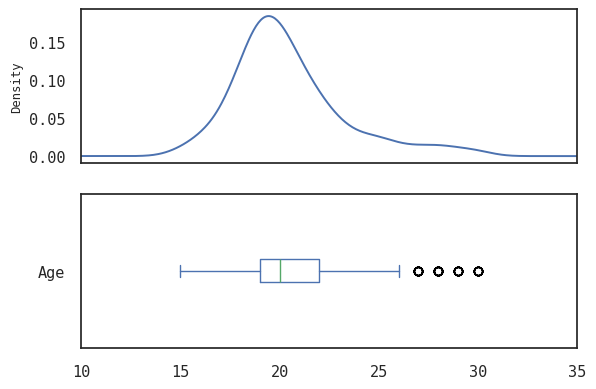

In [20]:
fig, axes = plt.subplots(2, 1, sharex=True)

df["Age"].plot(kind="density", ax=axes[0])
df["Age"].plot(kind="box", ax=axes[1], vert=False)

axes[1].set_xlim(10, 35)
plt.show()

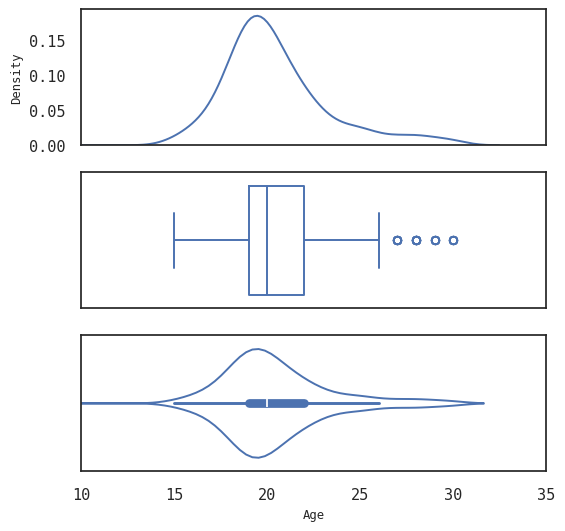

In [21]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(6,6))

sns.kdeplot(data=df, x="Age", ax=axes[0])
sns.boxplot(data=df, x="Age", ax=axes[1], fill=False)

# 'inner' helps you specify differnet plots within the violin
# 'fill' lets you remove the violin color.
sns.violinplot(data=df, x="Age", inner="box", fill=False, ax=axes[2])

axes[2].set_xlim(10, 35)
plt.show()

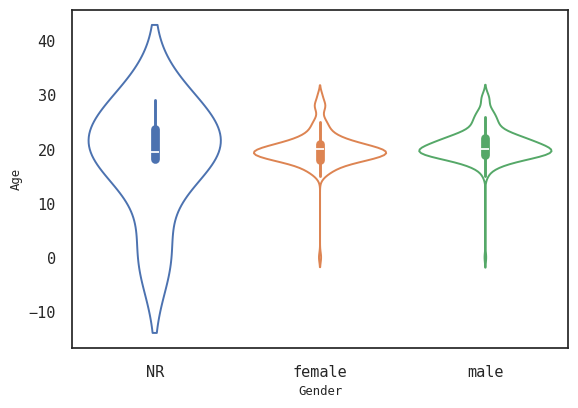

In [22]:

#! Strange plot for "NR".
fig, ax = plt.subplots()
sns.violinplot(data=df, x="Gender", y="Age", hue="Gender", fill=False, ax=ax)
plt.show()

# Hypothesis Testing

Do women fear certain phenomena significantly more than men?

In [23]:
cols_phobia

Index(['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats',
       'Ageing', 'Dangerous dogs', 'Fear of public speaking'],
      dtype='object')

In [24]:
df[df.Gender == "male"].Flying.value_counts(sort=True)

Flying
1    222
3     74
2     73
5     20
4     20
0      2
Name: count, dtype: int64

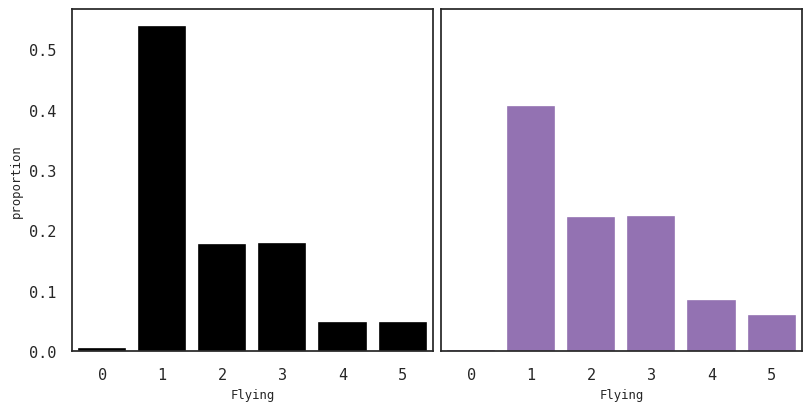

In [25]:

# * Using seaborn
fig, ax = plt.subplots(1, 2, layout="constrained", figsize=(8, 4), sharey=True)
# * stat="proportion" normalizes the data. There are other options like "count", "percent"
sns.countplot(ax=ax[0], data=df[df["Gender"] == "male"],   x="Flying", stat="proportion", color="black")
sns.countplot(ax=ax[1], data=df[df["Gender"] == "female"], x="Flying", stat="proportion", color="tab:purple")
plt.show()

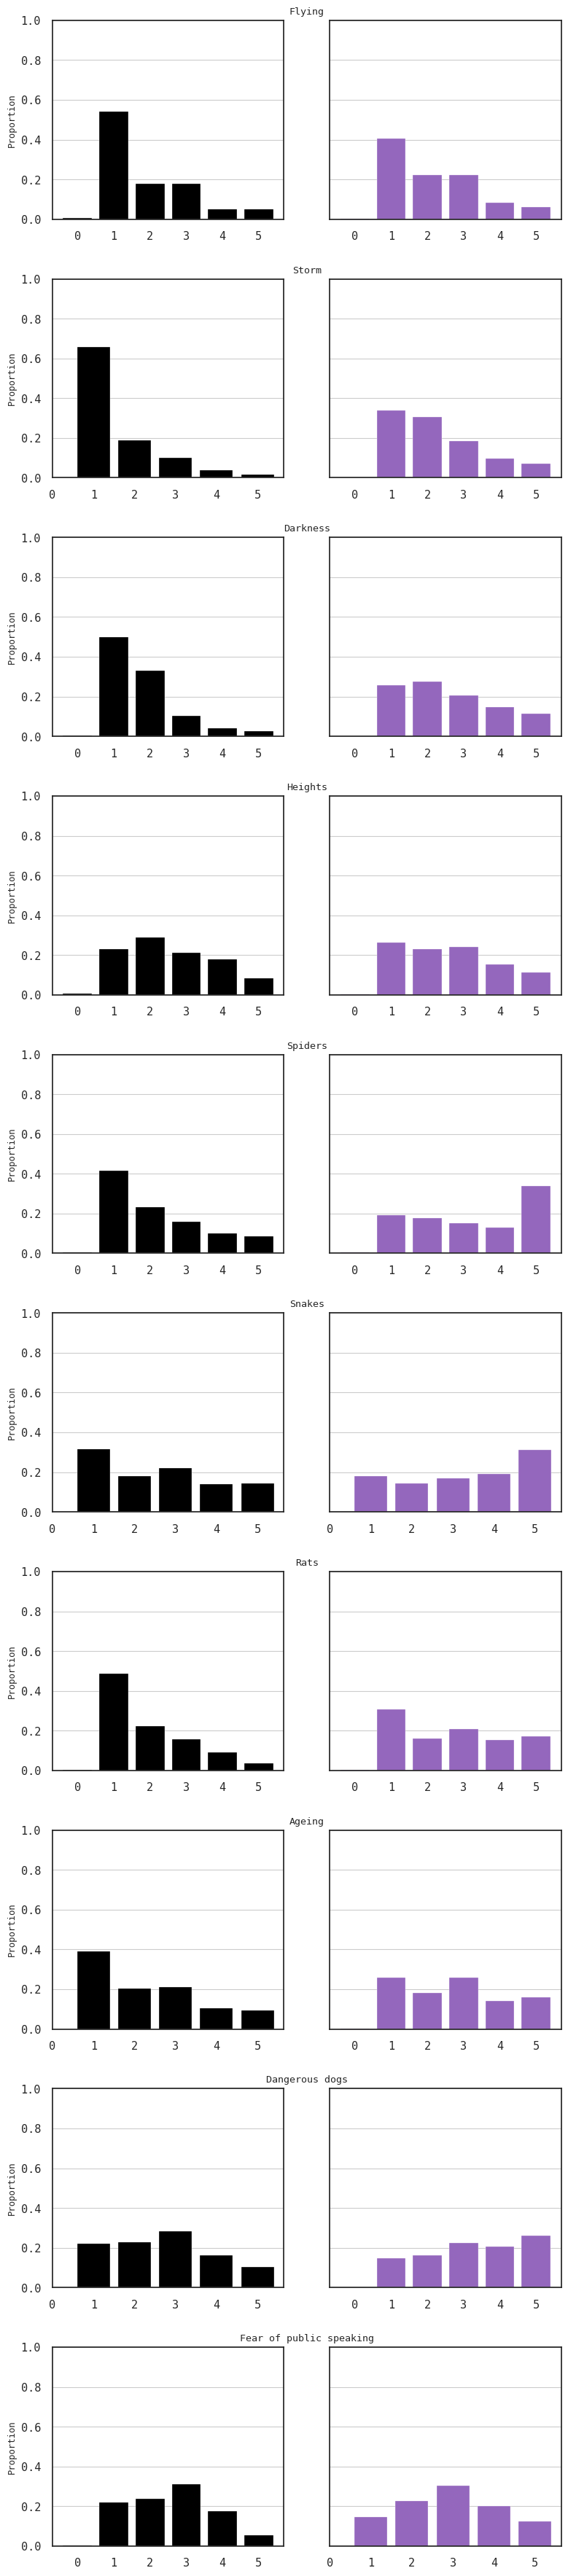

In [26]:

# * Using matplotlib
# Create a figure with 10 rows and 2 columns
fig, axes = plt.subplots(nrows=len(cols_phobia), ncols=2, figsize=(9, 45), sharey=True)

for i, phobia in enumerate(cols_phobia):
    # Get the male data
    male_data = df[phobia].loc[df["Gender"] == "male"]
    # Find the relative frequency of unique values
    male_data = male_data.value_counts(normalize=True)
    # Sort the index
    male_data = male_data.sort_index()

    # Plots male data
    axes[i, 0].bar(male_data.index, male_data.values, color="black")
    axes[i, 0].set_xticks(range(6), range(6))
    axes[i, 0].set_ylim(0, 1)
    axes[i, 0].set_title(phobia, x=1.1, y=1)
    axes[i, 0].grid(axis="y")
    axes[i, 0].set_ylabel("Proportion")

    # Get the female data
    female_data = df[phobia].loc[df["Gender"] == "female"]
    # Find the relative frequency of unique values
    female_data = female_data.value_counts(normalize=True)
    # Sort the index
    female_data = female_data.sort_index()

    # Plot female data
    axes[i, 1].bar(female_data.index, female_data.values, color="tab:purple")
    axes[i, 1].set_xticks(range(6), range(6))
    axes[i, 1].set_ylim(0, 1)
    axes[i, 1].grid(axis="y")

plt.subplots_adjust(hspace=0.3)
plt.show()

# Correlation

In [27]:
cols_health

Index(['Smoking', 'Alcohol', 'Healthy eating'], dtype='object')

In [28]:
cols_life

Index(['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism',
       'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises',
       'Loss of interest', 'Friends versus money', 'Funniness', 'Fake',
       'Criminal damage', 'Decision making', 'Elections', 'Self-criticism',
       'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive',
       'Giving', 'Compassion to animals', 'Borrowed stuff', 'Loneliness',
       'Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams',
       'Charity', 'Number of friends', 'Punctuality', 'Lying', 'Waiting',
       'New environment', 'Mood swings', 'Appearence and gestures',
       'Socializing', 'Achievements', 'Responding to a serious letter',
       'Children', 'Assertiveness', 'Getting angry',
       'Knowing the right people', 'Public speaking', 'Unpopularity',
       'Life struggles', 'Happiness in life', 'Energy levels',
       'Small - big dogs', 'Personality', 'Finding lost valuables',
 

In [29]:
df["Smoking"].unique() # doesn't have the desired order of categories.

['never smoked', 'tried smoking', 'former smoker', 'current smoker', 'NR']
Categories (5, object): ['NR', 'current smoker', 'former smoker', 'never smoked', 'tried smoking']

In [30]:
# Let us manually re-order them.
category_order = ["NR", "never smoked", "tried smoking", "former smoker", "current smoker"]
df["Smoking"] = pd.Categorical(df['Smoking'], categories=category_order, ordered=True)

In [31]:
df["Smoking"].unique()

['never smoked', 'tried smoking', 'former smoker', 'current smoker', 'NR']
Categories (5, object): ['NR' < 'never smoked' < 'tried smoking' < 'former smoker' < 'current smoker']

In [32]:
# Compute the correlation between the categorical codes of 'Smoking' and 'Happiness in life'
correlation = df.assign(Smoking=df['Smoking'].cat.codes)[['Smoking', 'Number of friends']].corr()
print(correlation)

                    Smoking  Number of friends
Smoking            1.000000           0.138072
Number of friends  0.138072           1.000000


# Heatmap
Extend the correlation computation to all finance related columns.

In [33]:
corr = df[cols_money].corr()
corr

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
Finances,1.000000,-0.055798,-0.126717,-0.289674,-0.200921,-0.090897,0.007575
Shopping centres,-0.055798,1.000000,0.359487,0.127863,0.481871,0.155952,0.106937
Branded clothing,-0.126717,0.359487,1.000000,0.327573,0.410579,0.352022,0.164356
Entertainment spending,-0.289674,0.127863,0.327573,1.000000,0.389520,0.329855,0.125836
Spending on looks,-0.200921,0.481871,0.410579,0.389520,1.000000,0.329806,0.232690
Spending on gadgets,-0.090897,0.155952,0.352022,0.329855,0.329806,1.000000,0.236902
Spending on healthy eating,0.007575,0.106937,0.164356,0.125836,0.232690,0.236902,1.000000


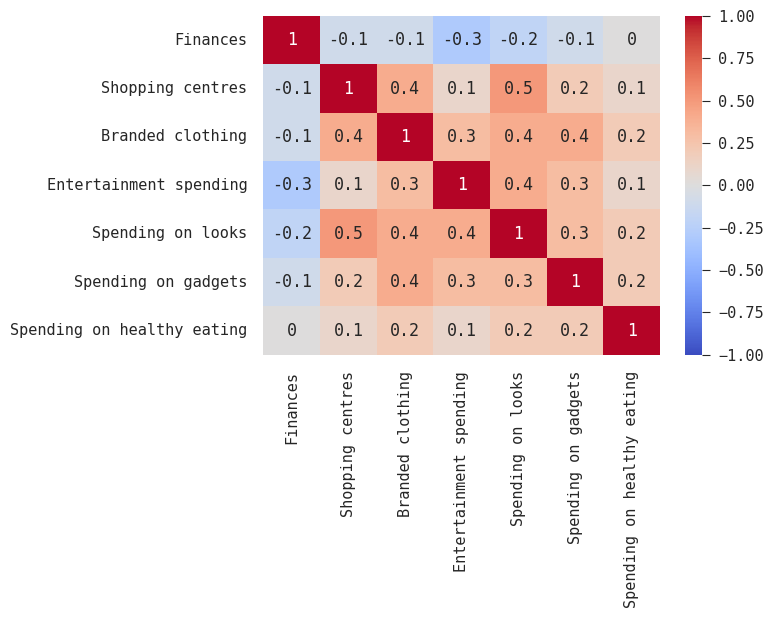

In [34]:
# you can avoid 'fig, ax = plt.subplots()' when you have just one axes.
sns.heatmap(
    corr.values.round(1), 
    cmap="coolwarm", # * Use a diverging color map
    vmin=-1, vmax=1, # * Specify vmin and vmax to control the divergence point of the color map.
    annot=True, # * Set this to true to show values.
    xticklabels=corr.columns,
    yticklabels=corr.columns
)
plt.savefig("../plots/heatmap_sns.png", dpi=200, bbox_inches="tight")

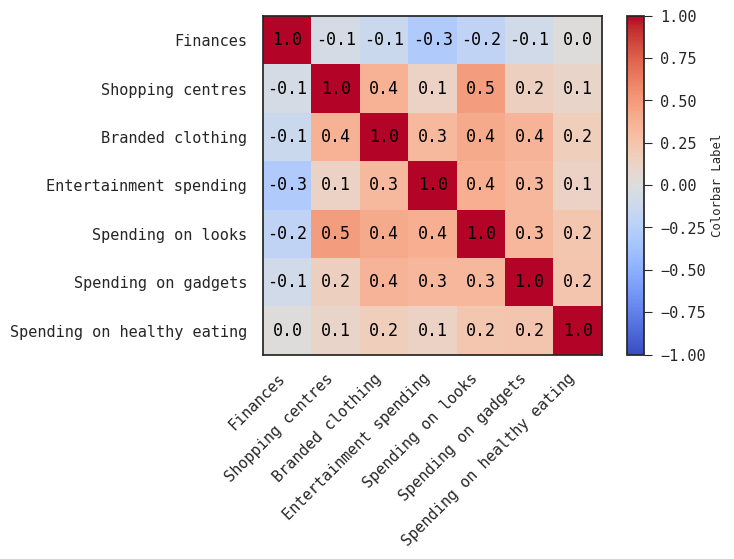

In [35]:

# * Heatmap using matplotlib
fig, ax = plt.subplots()

# Use a divergin colormap
# Specify vmin and vmax.
image = ax.imshow(corr.values, cmap="coolwarm", vmin=-1, vmax=1)

# Set the colorbar label
cbar = ax.figure.colorbar(image, ax=ax)
cbar.set_label('Colorbar Label')

# Annotate the heatmap.
for row in range(len(corr)):
    for col in range(len(corr)):
        text = ax.text(col, row, corr.values[row, col].round(1),
                       ha="center", va="center", color="black")

# Set ticks.
ax.set_xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
ax.set_yticks(range(len(corr)), corr.columns)
ax.grid(False)

# The plots are rendered blurry in the notebook.
# Use dpi to increase the resolution.
# Use bbox_inches="tight" if the plot goes out of bounds.
fig.savefig("../plots/heatmap_plt.png", dpi=200, bbox_inches="tight")